In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import odr
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    "Conc": [0, 1.25, 2.5, 5.0, 10.0, 20.0],
    "Angle": [
        [145.2, 144.5, 144.8, 145.2, 145.7, 144.5, 145.0],
        [142.7, 142.7, 142.7, 142.6, 143.0],
        [141.5, 141.0, 141.1, 140.5, 140.7],
        [136.9, 137.8, 137.3, 137.6, 137.8],
        [129.8, 130.6, 131.1, 130.0, 130.3, 131.3],
        [117.2, 117.7, 117.4, 117.3, 117.4]
    ]})

l = 21.5 # cm

df = df.explode("Angle")
df["Trial"] = df.groupby("Conc").cumcount() + 1
df = df.set_index(["Conc", "Trial"])
df

Angle
Conc  Trial       
0.00  1      145.2
      2      144.5
      3      144.8
      4      145.2
      5      145.7
      6      144.5
      7      145.0
1.25  1      142.7
      2      142.7
      3      142.7
      4      142.6
      5      143.0
2.50  1      141.5
      2      141.0
      3      141.1
      4      140.5
      5      140.7
5.00  1      136.9
      2      137.8
      3      137.3
      4      137.6
      5      137.8
10.00 1      129.8
      2      130.6
      3      131.1
      4      130.0
      5      130.3
      6      131.3
20.00 1      117.2
      2      117.7
      3      117.4
      4      117.3
      5      117.4

In [3]:
df = df.reset_index()
data = df.groupby("Conc", as_index=False)[["Angle"]].agg(["mean", "sem"])
data["θ"] = data.loc[0, ("Angle", "mean")] - data[("Angle", "mean")]
data["σ_θ"] = (data.loc[0, ("Angle", "sem")]**2 + data[("Angle", "sem")]**2)**0.5
data = data.drop("Angle", axis=1).drop(index=0)
data

/tmp/ipykernel_1676718/4188638207.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.drop("Angle", axis=1).drop(index=0)


,Conc,θ,σ_θ
,,,
1,1.25,2.245714,0.176053
2,2.50,4.025714,0.236632
3,5.00,7.505714,0.236209
4,10.00,14.469048,0.293267
5,20.00,27.585714,0.182742


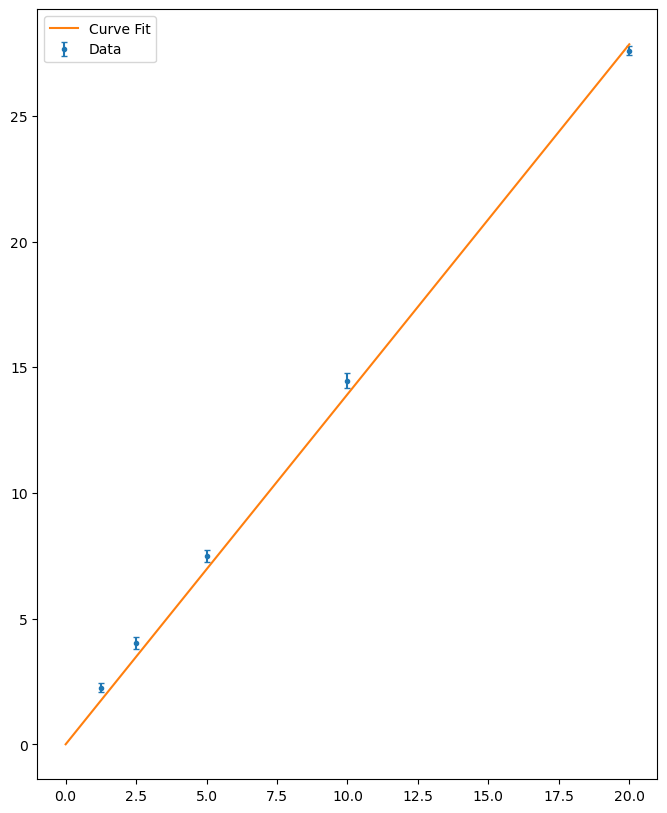

Specific Rotation (deg·mL·g−1·dm−1) = 64.76181079851737, error = 0.978558843223344


In [4]:
N, _ = df.shape

x= data['Conc'].to_numpy()
y = data['θ'].to_numpy()
σ = data['σ_θ'].to_numpy()

def model(conc, s):
    return s*l*conc/1000

param, param_cov = curve_fit(model, x, y, sigma=σ)

x_model = np.linspace(0, x[-1], 10)
y_model = model(x_model, param[0])

plt.figure(figsize=(8, 10))
plt.errorbar(x, y, yerr=σ, fmt='.', capsize=2, label='Data')
plt.plot(x_model, y_model, '-', label='Curve Fit')
plt.legend()
plt.show()
print(f'Specific Rotation (deg·mL·g−1·dm−1) = {param[0]}, error = {np.sqrt(param_cov[0, 0])}')